🧩 Assignment Tasks
✅ Task 1 — Business Understanding
Identify:
The target variable (company’s financial concern)
The input variables related to customer risk
Explain how your regression model helps the company control rising costs, not just predict them.

✅ Task 2 — Data Inspection
Explore the dataset and:
Separate numeric and categorical columns
Identify columns that are not directly usable in regression
Report any data quality issues you observe.

✅ Task 3 — Data Cleaning & Encoding
Convert categorical variables into numeric form.
Decide how to handle:
Region information
Binary attributes like lifestyle indicators
Justify each transformation from a business and modeling perspective.

✅ Task 4 — Feature Scaling & Comparability
Observe differences in value ranges among numeric features.
Explain why scaling is important when comparing regression coefficients.
Prepare the data so the effect of each variable can be fairly interpreted.

⚠️ Task 5 — The Hidden Trap (Multicollinearity)
Analyze relationships between independent variables.
Identify any highly correlated features (example: age, BMI, and lifestyle habits).
Explain:
Why multicollinearity is a problem in Multiple Linear Regression
How it can confuse business decision-making
Take appropriate steps to fix the issue.
 

In [10]:

# -----------------------------
# TASK 1: Business Understanding
# -----------------------------
import pandas as pd

# Load dataset
df = pd.read_csv("insurance.csv")

# Standardize column names (safe for coding)
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Check column names
print("Columns in dataset:", df.columns.tolist())

# Define target and ID column
target = 'customer_cost'  # replace with actual target column name
id_column = 'customer_id'  # replace with actual ID column name if exists

# Input features (drop target & ID safely)
features = df.drop(columns=[target, id_column], errors='ignore')

print("\nTarget variable:", target)
print("Input features:", features.columns.tolist())

# Business explanation:
# Regression will predict customer cost and quantify the impact of factors
# like age, BMI, lifestyle, etc., helping the company control costs proactively.



Columns in dataset: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Target variable: customer_cost
Input features: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


Numeric columns: ['age', 'bmi', 'children', 'charges']
Categorical columns: ['sex', 'smoker', 'region']

Columns that may not be usable for regression: ['customer_id']

Missing values per column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


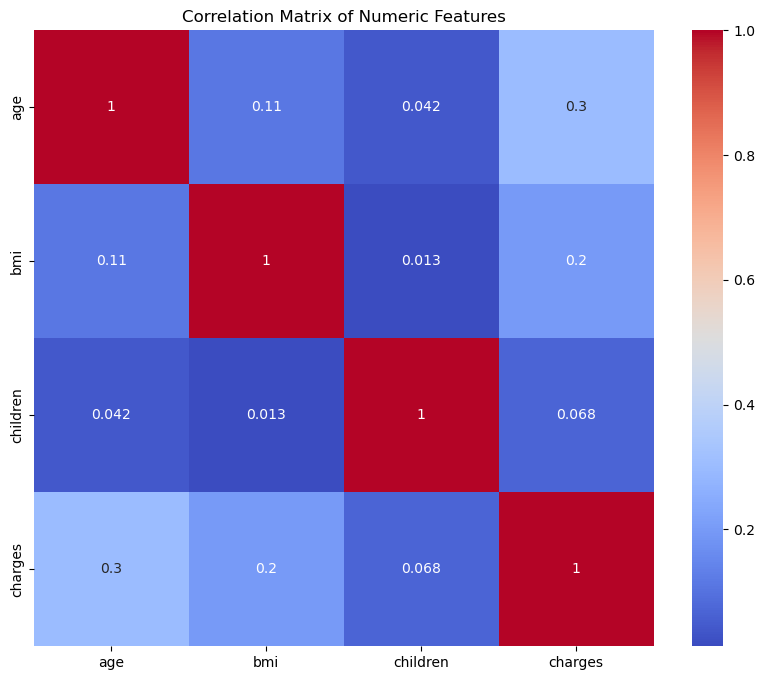

In [11]:
# -----------------------------
# TASK 2: Data Inspection
# -----------------------------
# Separate numeric and categorical columns
numeric_cols = features.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = features.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# Columns not directly usable
print("\nColumns that may not be usable for regression:", [id_column])

# Check missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Correlation matrix of numeric features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [20]:
# -----------------------------
# TASK 3: Data Cleaning & Encoding
# -----------------------------
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Copy dataset to avoid chained assignment issues
df_encoded = df.copy()

# Convert binary categorical variables
df_encoded['sex'] = df_encoded['sex'].map({'male': 1, 'female': 0})
df_encoded['smoker'] = df_encoded['smoker'].map({'yes': 1, 'no': 0})

# Separate features and target
X = df_encoded.drop(columns=['charges'])
y = df_encoded['charges']

# Columns for One-Hot Encoding
onehot_cols = ['region']

# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('region', OneHotEncoder(drop='first'), onehot_cols)
    ],
    remainder='passthrough'   # keeps numeric & binary columns
)

# Apply transformation
X_final = preprocessor.fit_transform(X)

print("Shape after encoding:", X_final.shape)



Shape after encoding: (1338, 8)


In [18]:
# -----------------------------
# TASK 4: Feature Scaling
# -----------------------------
from sklearn.preprocessing import StandardScaler

# Standardize features for fair comparison
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature matrix shape after scaling:", X_scaled.shape)

# Explanation:
# Scaling ensures coefficients are comparable and interpretable
# across different features (age vs income vs BMI, etc.).


Feature matrix shape after scaling: (1338, 8)


In [21]:
# -----------------------------
# TASK 5: Multicollinearity (FINAL CORRECT VERSION)
# -----------------------------
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Use SCALED + ENCODED features
X_vif = sm.add_constant(X_scaled)

vif_data = pd.DataFrame()
vif_data["Feature"] = ["const"] + list(preprocessor.get_feature_names_out())
vif_data["VIF"] = [
    variance_inflation_factor(X_vif, i)
    for i in range(X_vif.shape[1])
]

print(vif_data)


                    Feature       VIF
0                     const  1.000000
1  region__region_northwest  1.008900
2  region__region_southeast  1.012074
3  region__region_southwest  1.518823
4            remainder__age  1.652230
5            remainder__sex  1.529411
6            remainder__bmi  1.016822
7       remainder__children  1.106630
8         remainder__smoker  1.004011
